<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
Text Clustering
</div>



* Clustering is a daya mining technique which groups inlabeled data based on their similarities or differences.

* Clustering algorithms are used to process raw unclassified data objects into groups represented by structures or patterns in the information.

* CLustering algorithms can be cateogrized into a few types, specially exclusive, overlaping, heirarchial and proabilistics.

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("headlines.csv", header=None)

In [9]:
print(df[0][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

In [10]:
import nltk
from nltk import pos_tag
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [24]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [15]:
def lemmatize(word):

    tag = pos_tag([word])
    wnl = WordNetLemmatizer()

    pos = 'n'

    if tag[0][1].startswith('N'):
        pos = 'n'
    if tag[0][1].startswith('V'):
        pos = 'v'
    if tag[0][1].startswith('J'):
        pos = 'a'
    if tag[0][1].startswith('R'):
        pos = 'r'

    return wnl.lemmatize(word=word, pos=pos)

lemmatize('like') , lemmatize('programming')

('like', 'program')

In [21]:
swords = stopwords.words('english')
swords.append('said')
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for  token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [25]:
sent = 'Hello friencds! How are you? I like python programming.'
clean_text(sent=sent)

['hello', 'friencds', 'like', 'python', 'program']

In [26]:
clean_df = df[0].apply(clean_text)

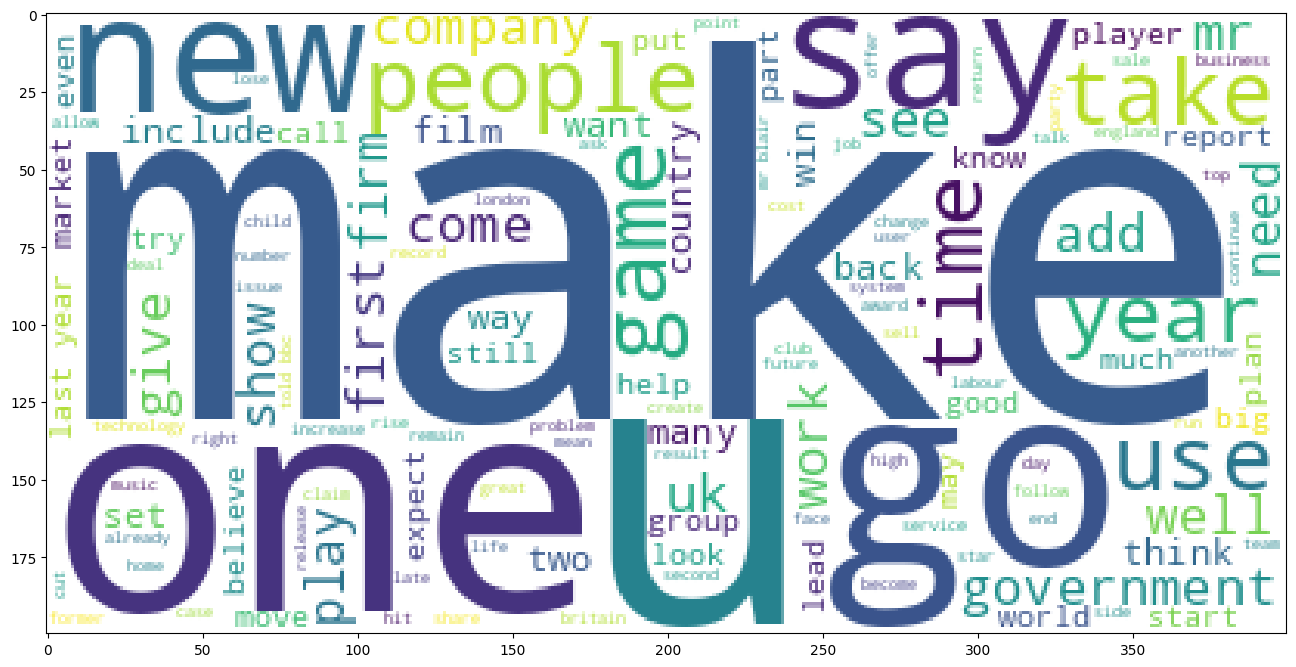

In [27]:
cleandata = ' '.join(clean_df.apply(lambda x : ' '.join(x)))

wcloud = WordCloud(
    background_color='white'
).generate(cleandata)


plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [30]:
X_new = tfidf.fit_transform(df[0])
X_new.shape

(2225, 21406)

In [31]:
from sklearn.cluster import KMeans

In [32]:
km = KMeans(random_state=24)

In [33]:
labels = km.fit_predict(X_new)

labels

array([2, 0, 2, ..., 6, 6, 6], dtype=int32)

In [34]:
km.inertia_

2071.783064741358

In [35]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=24, n_init='auto')
    km.fit_predict(X_new)
    sse.append(km.inertia_)
    del km


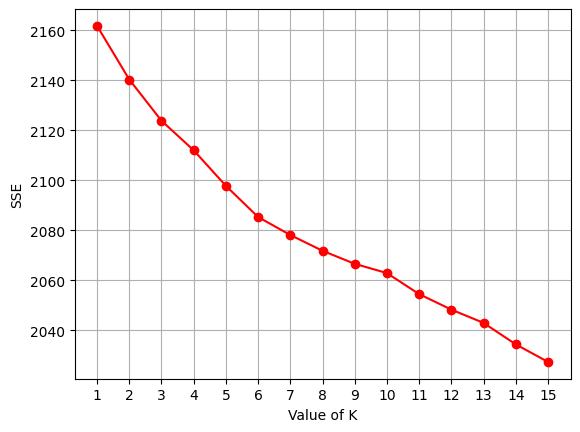

In [37]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o', color='r')

In [38]:
km = KMeans(n_clusters=5, random_state=24, n_init='auto')
labels = km.fit_predict(X_new)

In [39]:
df['labels'] = labels

In [40]:
zero = df[df['labels'] == 0]
one = df[df['labels'] == 1]
two = df[df['labels'] == 2]
three = df[df['labels'] == 3]
four = df[df['labels'] == 4]

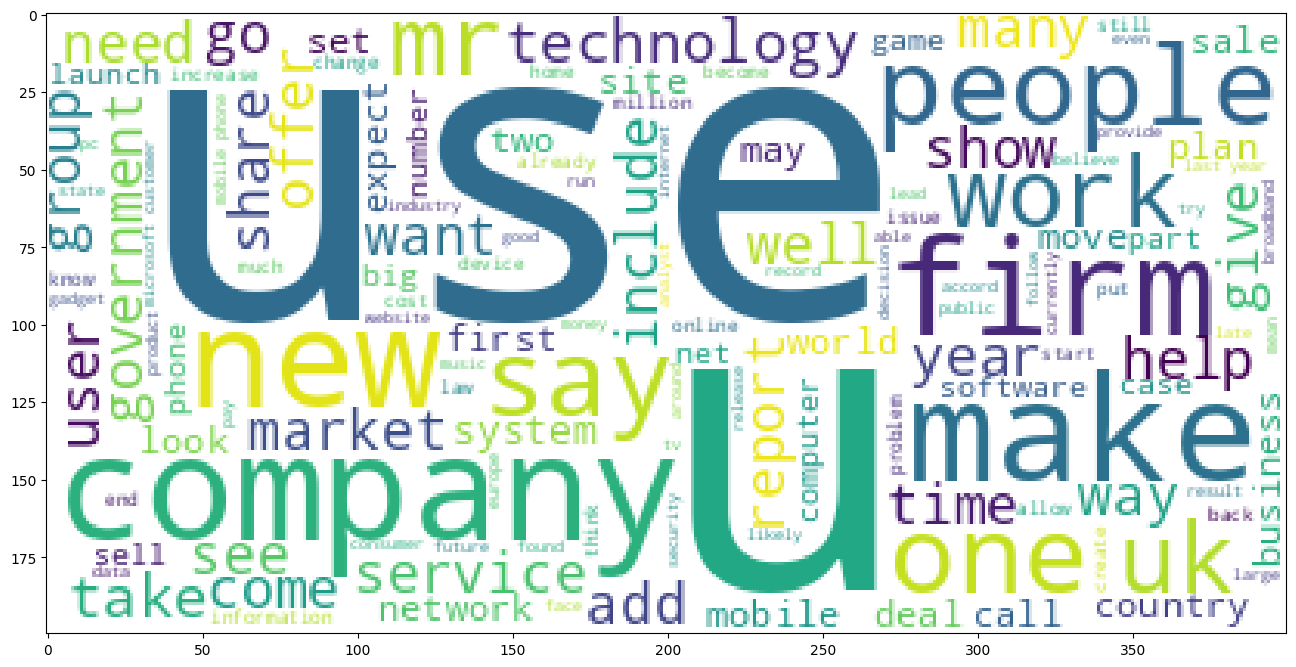

In [43]:
cleandata_zero = ' '.join(zero[0].apply(lambda x : ' '.join(clean_text(x))))

wcloud = WordCloud(
    background_color='white'
).generate(cleandata_zero)

plt.figure(figsize=(16,9))
plt.imshow(wcloud)

# Lable is finance

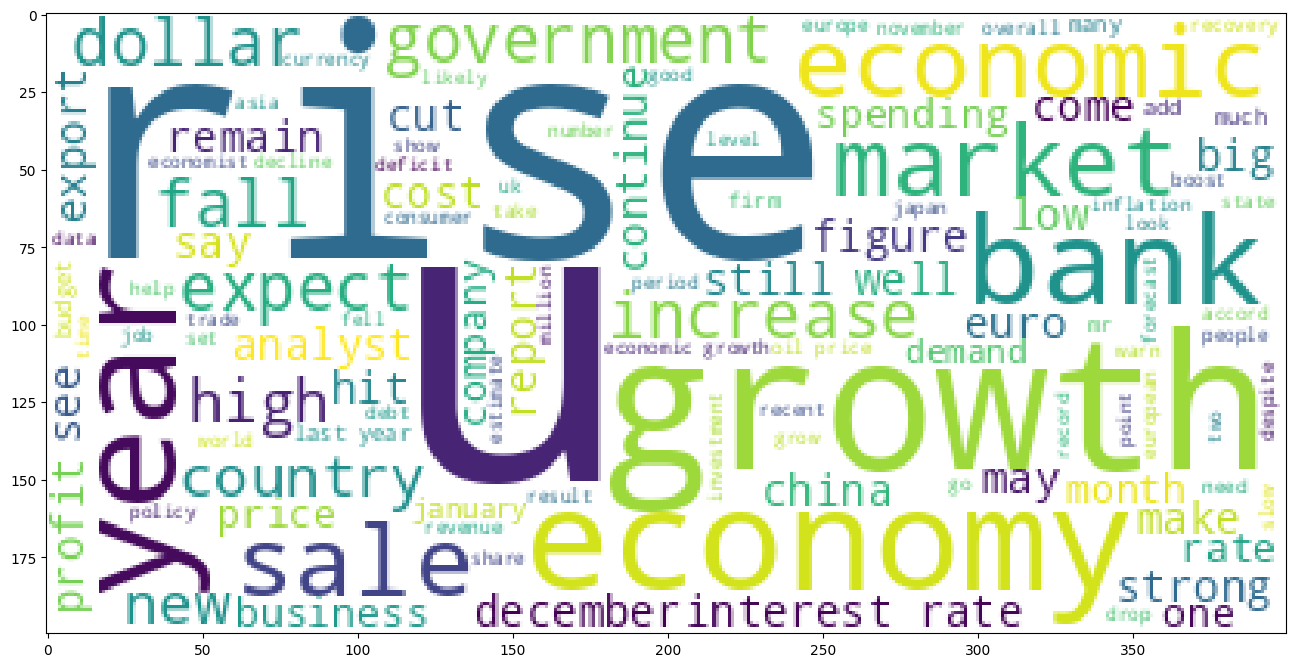

In [44]:
cleandata_one = ' '.join(one[0].apply(lambda x : ' '.join(clean_text(x))))

wcloud = WordCloud(
    background_color='white'
).generate(cleandata_one)


plt.figure(figsize=(16,9))
plt.imshow(wcloud)
# Label is Economics

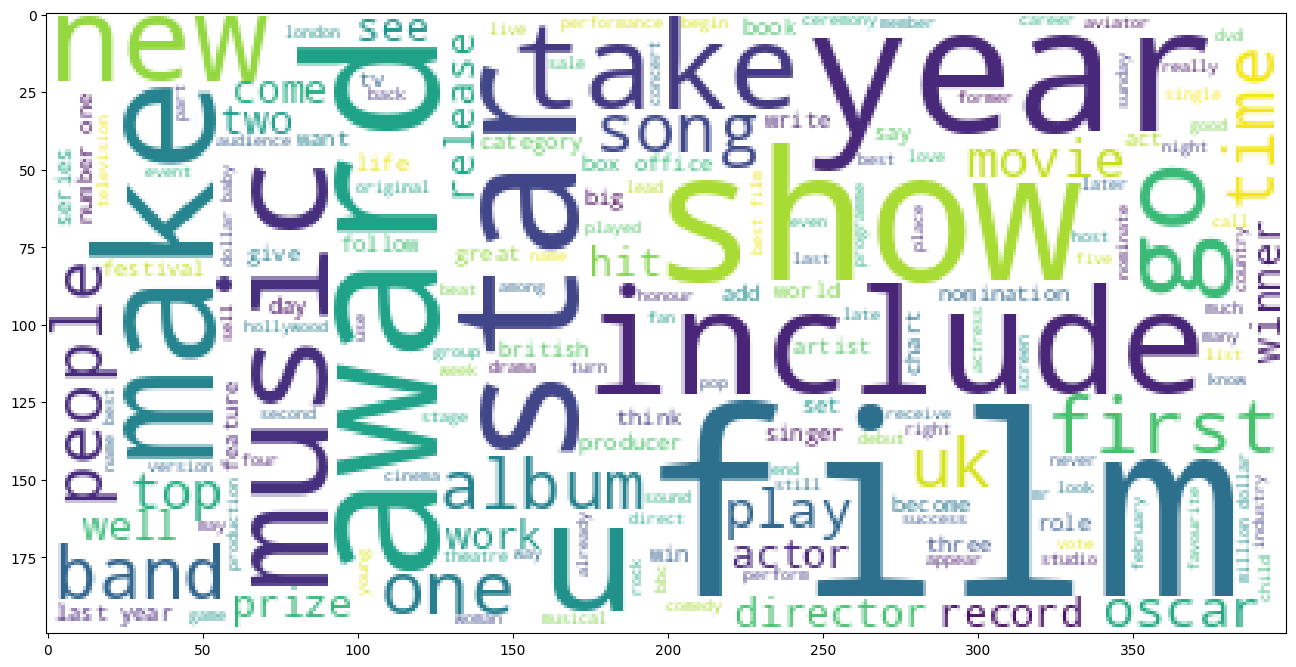

In [45]:
cleandata_two = ' '.join(two[0].apply(lambda x : ' '.join(clean_text(x))))

wcloud = WordCloud(
    background_color='white'
).generate(cleandata_two)


plt.figure(figsize=(16,9))
plt.imshow(wcloud)
# Label is Entertainment

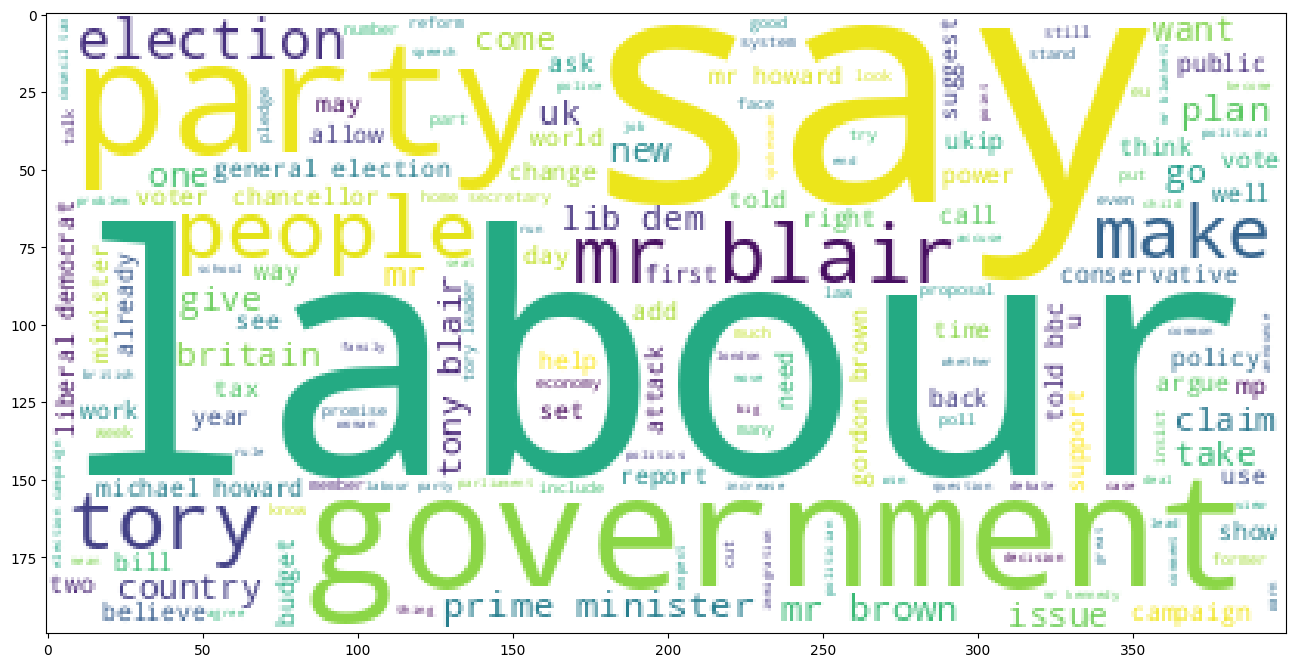

In [46]:
cleandata_three = ' '.join(three[0].apply(lambda x : ' '.join(clean_text(x))))

wcloud = WordCloud(
    background_color='white'
).generate(cleandata_three)


plt.figure(figsize=(16,9))
plt.imshow(wcloud)

# Label is Polytics

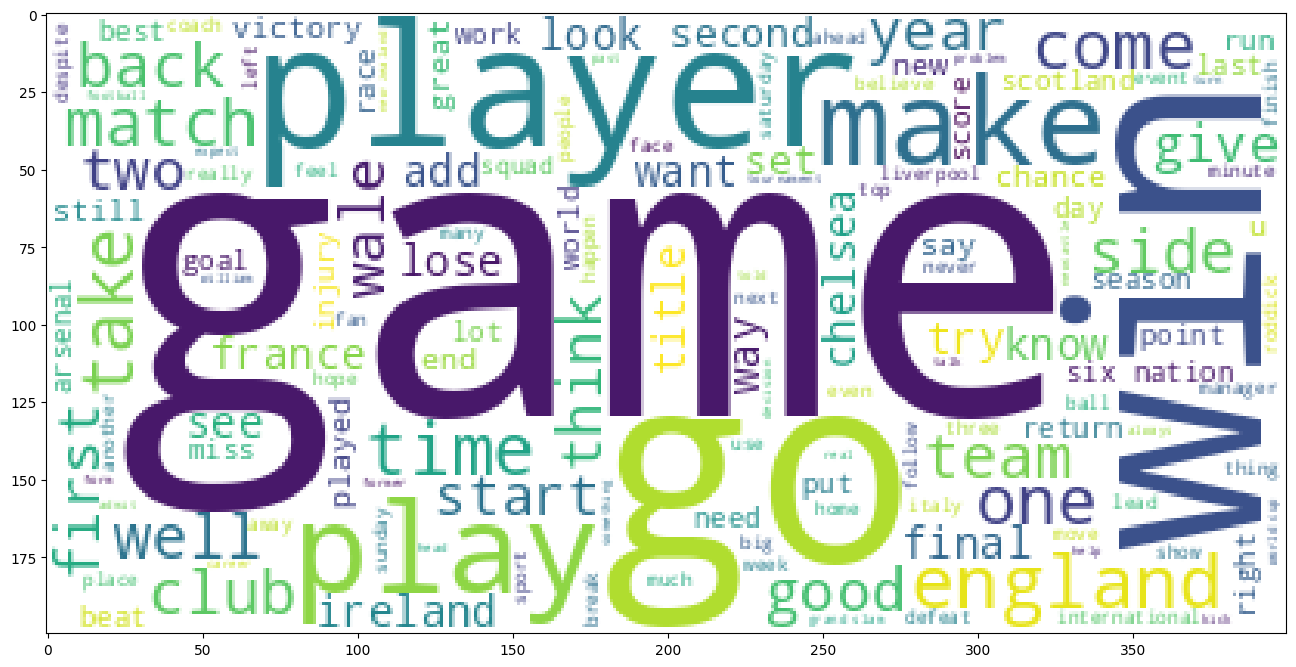

In [47]:
cleandata_four = ' '.join(four[0].apply(lambda x : ' '.join(clean_text(x))))

wcloud = WordCloud(
    background_color='white'
).generate(cleandata_four)


plt.figure(figsize=(16,9))
plt.imshow(wcloud)

# Label is Spots

In [50]:
from nltk import FreqDist
for t_df in [zero, one, two, three, four]:
    new = ' '.join(t_df[0])
    clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
    freq = FreqDist(clean)
    print(freq.most_common(10))

[('Mr', 1234), ('people', 1168), ('would', 1093), ('also', 939), ('US', 871), ('new', 803), ('could', 782), ('year', 696), ('one', 622), ('company', 566)]
[('US', 353), ('year', 349), ('growth', 316), ('economy', 306), ('economic', 231), ('prices', 201), ('sales', 187), ('market', 175), ('also', 165), ('dollar', 160)]
[('film', 664), ('best', 563), ('also', 331), ('year', 326), ('music', 274), ('one', 253), ('US', 251), ('show', 240), ('first', 222), ('number', 218)]
[('Mr', 1484), ('would', 816), ('Labour', 727), ('Blair', 551), ('election', 547), ('government', 500), ('party', 412), ('people', 406), ('Brown', 388), ('also', 331)]
[('game', 654), ('England', 464), ('first', 446), ('would', 422), ('win', 411), ('time', 395), ('last', 368), ('one', 356), ('two', 349), ('play', 348)]
